# Proyek Analisis Data: Bike Sharing Dataset
- Nama:Dwi Aji Prasetyo
- Email: dwiajiprasetyo07@gmail.com
- Id Dicoding: dwiaji_prstyo

## Menentukan Pertanyaan Bisnis

1.   Bagaimana persebaran jenis pelanggan pada tahun 2011 dan 2022 ?
2.   Bagaimana persebaran jenis pelanggan per tahun dipandang dari musimnya?
3. Bagaimana grafik perkembangan pelanggan tiap bulan pada tahun 2011 dan tahun 2012?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

Mendownload file database dan mengekstraknya

In [2]:
!gdown 1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
local_zip= 'Bike-sharing-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('file/')
zip_ref.close()

Downloading...
From: https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: /content/Bike-sharing-dataset.zip
100% 280k/280k [00:00<00:00, 16.7MB/s]


## Data Wrangling

### Gathering Data

Membuka file readme.txt agar mengetahui informasi lebih mengenai dataset

In [3]:
with open('/content/file/Readme.txt', 'r') as txt:
    print(txt.read())

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

Membuka day.csv dan mengembalikan nilai pada beberapa kolom ke nilai aslinya

In [4]:
day_df = pd.read_csv('/content/file/day.csv') #membuka file csv

# mengembalikan nilai kolom ke nilai aslinya (sebelum dinormalisasi)
day_df['temp'] = day_df['temp']*41
day_df['atemp'] = day_df['atemp']*50
day_df['hum'] = day_df['hum']*100
day_df['windspeed'] = day_df['windspeed']*67

day_df.head() #Menampilkan 5 baris awal pada tabel day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
day_df['casual'].sort_values(ascending=False)

504    3410
512    3283
462    3252
623    3160
441    3155
       ... 
11       25
26       15
17        9
725       9
667       2
Name: casual, Length: 731, dtype: int64

Membuka hour.csv dan mengembalikan nilai pada beberapa kolom ke nilai aslinya

In [6]:
hour_df = pd.read_csv('/content/file/hour.csv')
hour_df['temp'] = hour_df['temp']*41
hour_df['atemp'] = hour_df['atemp']*50
hour_df['hum'] = hour_df['hum']*100
hour_df['windspeed'] = hour_df['windspeed']*67
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1


In [7]:
hour_df.groupby(by=["mnth"]).agg({
    "registered": ["sum"],
    "cnt" : ["max", "min", "sum"]
})

registered  cnt            
            sum  max min     sum
mnth                            
1        122891  559   1  134933
2        136389  610   1  151352
3        184476  957   1  228920
4        208292  822   1  269094
5        256401  873   1  331686
6        272436  900   1  346342
7        266791  913   1  344948
8        279155  941   1  351194
9        275668  977   1  345991
10       262592  963   1  322352
11       218228  729   1  254831
12       189343  759   1  211036

In [8]:
day_df.groupby(by=["mnth"]).agg({
    "registered": ["sum"],
    "cnt" : ["max", "min", "sum"]
})

registered   cnt              
            sum   max   min     sum
mnth                               
1        122891  4521   431  134933
2        136389  5062  1005  151352
3        184476  8362   605  228920
4        208292  7460   795  269094
5        256401  8294  2633  331686
6        272436  8120  3767  346342
7        266791  8173  3285  344948
8        279155  7865  1115  351194
9        275668  8714  1842  345991
10       262592  8156    22  322352
11       218228  6852  1495  254831
12       189343  6606   441  211036

### Assessing Data

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


pada data tipe diatas, tujuan kita adalah mengubah tipe untuk kolom dteday menjadi tipe data 'datetime'

In [10]:
day_df['dteday']=pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

melihat apakah ada baris duplikasi pada tabel day

In [11]:
print("Jumlah duplikasi pada tabel day: ",day_df.duplicated().sum())

Jumlah duplikasi pada tabel day:  0


In [12]:
day_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,20.310776,7.505091,2.424346,13.820424,20.431653,26.872076,35.328347
atemp,731.0,23.717699,8.148059,3.953480,16.892125,24.336650,30.430100,42.044800


Mengubah tipe data pada kolom dteday menjadi datetime

In [13]:
hour_df['dteday']=pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [14]:
print("Jumlah duplikasi pada tabel hour: ",hour_df.duplicated().sum())

Jumlah duplikasi pada tabel hour:  0


In [15]:
hour_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.000,2.0000,4.0000
temp,17379.0,20.376474,7.894801,0.82,13.9400,20.500,27.0600,41.0000


In [16]:
day_df.season.value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

### Cleaning Data

## Exploratory Data Analysis (EDA)

### Explore day.csv

Menampilkan data dari tabel day yang menampilkan berdasarkan bulannya untuk tipe pelanggan casual, rgistered dan totalnya

In [17]:
monthly_df = day_df.groupby(by="mnth").agg({
    "casual": ["nunique","sum","mean", "std"],
    "registered": ["nunique","sum","mean", "std"],
    "cnt": ["nunique","sum", "mean", "std"]
})

monthly_df

casual                                 registered                       \
     nunique    sum         mean         std    nunique     sum         mean   
mnth                                                                           
1         57  12042   194.225806  197.384490         61  122891  1982.112903   
2         52  14963   262.508772  232.283549         57  136389  2392.789474   
3         60  44444   716.838710  624.308094         61  184476  2975.419355   
4         60  60802  1013.366667  738.345585         60  208292  3471.533333   
5         62  75285  1214.274194  754.950311         61  256401  4135.500000   
6         56  73906  1231.766667  664.017647         58  272436  4540.600000   
7         61  78157  1260.596774  598.382778         60  266791  4303.080645   
8         58  72039  1161.919355  466.576274         61  279155  4502.500000   
9         59  70323  1172.050000  738.378375         60  275668  4594.466667   
10        62  59760   963.870968  703.205576         62  262592  4235.354839   
11        57  36603   610.050000  470.933096         60  218228  3637.133333   
12        60  21693   349.887097  222.634531         62  189343  3053.919355   

                      cnt                                    
              std nunique     sum         mean          std  
mnth                                                         
1     1053.274474      62  134933  2176.338710  1161.674370  
2     1091.126003      57  151352  2655.298246  1145.313307  
3     1513.254354      60  228920  3692.258065  1899.301812  
4     1414.571151      60  269094  4484.900000  1776.160778  
5     1093.179612      62  331686  5349.774194  1298.711561  
6     1012.958885      60  346342  5772.366667  1240.400031  
7     1190.542490      62  344948  5563.677419  1273.751871  
8     1335.126601      62  351194  5664.419355  1494.516146  
9     1547.716749      60  345991  5766.516667  1810.130649  
10    1685.022519      62  322352  5199.225806  1988.392517  
11    1219.589045      60  254831  4247.183333  1285.712709  
12    1465.052959      62  211036  3403.806452  1549.639353

In [18]:
casual_by_years = day_df.groupby(day_df['dteday'].dt.year)['casual'].sum()
registered_by_years = day_df.groupby(day_df['dteday'].dt.year)['registered'].sum()
count_by_years = day_df.groupby(day_df['dteday'].dt.year)['cnt'].sum()

In [19]:
casual_by_years

dteday
2011    247252
2012    372765
Name: casual, dtype: int64

In [20]:
registered_by_years

dteday
2011     995851
2012    1676811
Name: registered, dtype: int64

In [21]:
count_by_years

dteday
2011    1243103
2012    2049576
Name: cnt, dtype: int64

In [22]:
day_df.groupby(by=["yr", "mnth"]).agg({
    "casual": ["max", "min", "sum" ],
    "registered": ["max", "min", "sum"],
    "cnt" : ["max", "min", "sum"]
})

casual             registered                 cnt              
           max  min    sum        max   min     sum   max   min     sum
yr mnth                                                                
0  1       331    9   3073       1844   416   35116  1985   431   38189
   2       694   47   6242       2348   905   41973  2927  1005   48215
   3      1424   46  12826       2355   491   51219  3239   605   64045
   4      1965  121  22346       3722   674   72524  5312   795   94870
   5      2355  255  31050       4238  2213  104771  5805  2633  135821
   6      1920  513  30612       4488  2993  112900  5515  3767  143512
   7      3065  562  36452       4220  2298  104889  6043  3285  141341
   8      1914  226  28842       4614   889  107849  5895  1115  136691
   9      2521  118  26545       4372  1689  100873  5423  1842  127418
   10     2397   57  25222       4267   570   98289  5511   627  123511
   11     1275   69  15594       3891   935   86573  4486  1495  102167
   12      706   50   8448       3672   451   78875  3940   705   87323
1  1      1070   67   8969       4185  1234   87775  4521  1301   96744
   2      1435   65   8721       4546  1456   94416  5062  1529  103137
   3      3155  203  31618       5893  2339  133257  8362  3194  164875
   4      3252  120  38456       5950   907  135768  7460  1027  174224
   5      3410  342  44235       6433  2501  151630  8294  2843  195865
   6      2963  477  43294       6456  3594  159536  8120  4127  202830
   7      2562  747  41705       6790  3195  161902  8173  4459  203607
   8      2827  935  43197       6541  3341  171306  7865  4549  214503
   9      3160  371  43778       6946  3197  174795  8714  4073  218573
   10     3031    2  34538       6911    20  164303  8156    22  198841
   11     2290  123  21009       5520  1470  131655  6852  2277  152664
   12     1153    9  13245       6055   432  110468  6606   441  123713

Membuat tabel baru dari tabel day dimana hanya menampilkan baris pada tahun 2011

In [23]:
day_df_2011 = day_df.loc[day_df['yr'] == 0]
day_df_2011

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,2011-12-27,1,0,12,0,2,1,2,13.325000,16.38165,76.2500,12.626150,103,1059,1162
361,362,2011-12-28,1,0,12,0,3,1,1,12.264330,13.99870,50.3913,19.695387,255,2047,2302
362,363,2011-12-29,1,0,12,0,4,1,1,10.181653,13.19460,57.4167,8.000604,254,2169,2423
363,364,2011-12-30,1,0,12,0,5,1,1,12.778347,15.94060,63.6667,9.000579,491,2508,2999


Membuat tabel baru dari tabel day dimana hanya menampilkan baris pada tahun 2012

In [24]:
day_df_2012 = day_df.loc[day_df['yr'] == 1]
day_df_2012

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
365,366,2012-01-01,1,1,1,0,0,0,1,15.170000,18.78105,69.2500,12.875189,686,1608,2294
366,367,2012-01-02,1,1,1,1,1,0,1,11.194763,12.61520,38.1304,22.087555,244,1707,1951
367,368,2012-01-03,1,1,1,0,2,1,1,6.150000,6.31375,44.1250,24.499957,89,2147,2236
368,369,2012-01-04,1,1,1,0,3,1,2,4.407500,5.96685,41.4583,12.374900,95,2273,2368
369,370,2012-01-05,1,1,1,0,4,1,1,10.899153,13.92060,52.4167,8.709129,140,3132,3272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana persebaran jenis pelanggan pada tahun 2011 dan 2022 ?

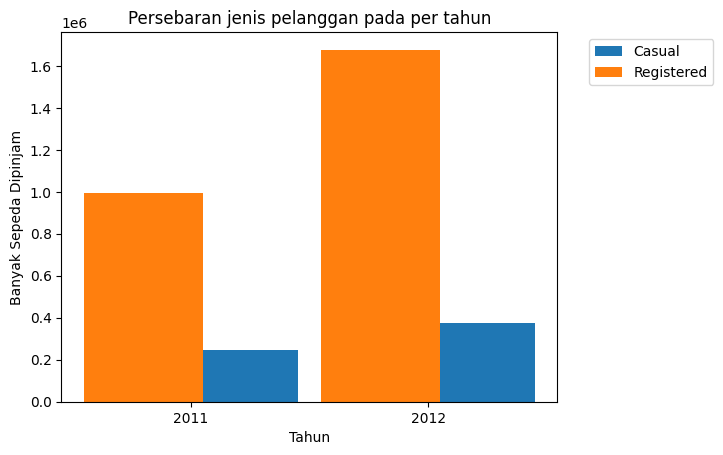

In [25]:
tahun = ('2011', '2012')
Casual = day_df.groupby(by="yr").casual.sum()
Registered = day_df.groupby(by="yr").registered.sum()

X_axis = np.arange(len(tahun))

plt.bar(X_axis+0.2, Casual, 0.5, label = 'Casual')
plt.bar(X_axis-0.2, Registered,0.5, label = 'Registered')

plt.xticks(X_axis, tahun)
plt.xlabel("Tahun")
plt.ylabel("Banyak Sepeda Dipinjam")
plt.title("Persebaran jenis pelanggan pada per tahun")
plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()

In [26]:
print("Peningkatan pelanggan tipe Casual \n")

print(np.round(((Casual[1]-Casual[0])*100/Casual[0]),2),'%')

Peningkatan pelanggan tipe Casual 

50.76 %


In [27]:
print("Peningkatan pelanggan tipe Registered \n")

print(np.round(((Registered[1]-Registered[0])*100/Registered[0]),2),'%')

Peningkatan pelanggan tipe Registered 

68.38 %


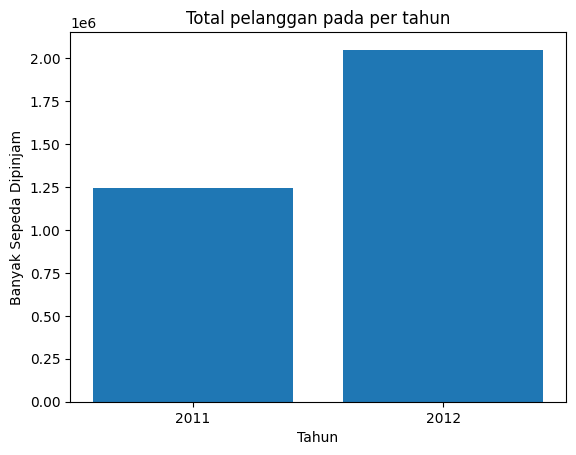

In [28]:
Count = day_df.groupby(by="yr").cnt.sum()

plt.bar(X_axis, Count, label = 'Total Pelanggan')

plt.xticks(X_axis, tahun)
plt.xlabel("Tahun")
plt.ylabel("Banyak Sepeda Dipinjam")
plt.title("Total pelanggan pada per tahun")
#plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()

In [29]:
print(Casual, '\n')
print(Registered)

yr
0    247252
1    372765
Name: casual, dtype: int64 

yr
0     995851
1    1676811
Name: registered, dtype: int64


In [30]:
Registered[1]-Registered[0]

680960

Didapat bahwa kenaikan tipe pelanggan jenis *casual* dari 247252 pada tahun 2011 menjadi 372765 pada tahun 2012. <br> <br>


Kenaikan sebesar 680960 pelanggan tipe *registered* dari tahun 2011 ke tahun 2012.

### Pertanyaan 2:

Bagaimana persebaran jenis pelanggan per tahun dipandang dari musimnya?

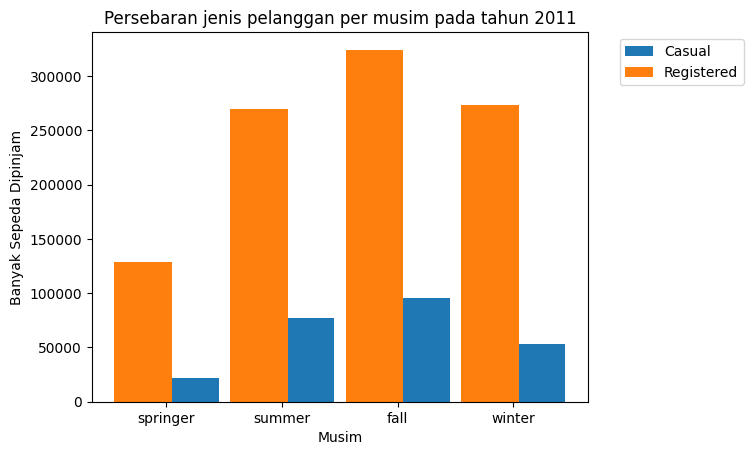

In [31]:
musim = ('springer', 'summer', 'fall','winter')
Casual_season = day_df_2011.groupby(by="season").casual.sum()
Registered_season = day_df_2011.groupby(by="season").registered.sum()

X1_axis = np.arange(len(musim))

plt.bar(X1_axis+0.2, Casual_season, 0.5, label = 'Casual')
plt.bar(X1_axis-0.2, Registered_season,0.5, label = 'Registered')

plt.xticks(X1_axis, musim)
plt.xlabel("Musim")
plt.ylabel("Banyak Sepeda Dipinjam")
plt.title("Persebaran jenis pelanggan per musim pada tahun 2011")
plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()

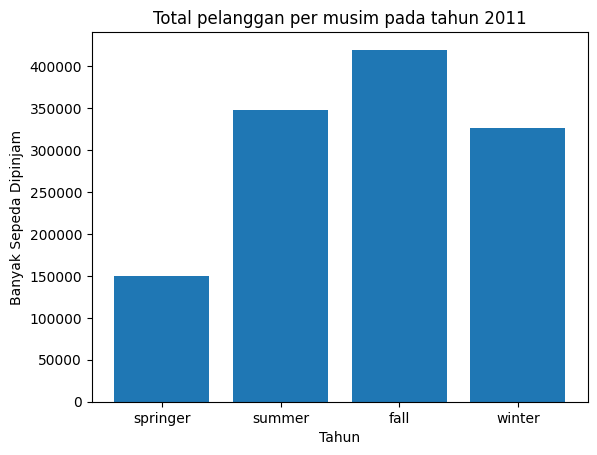

In [32]:
Count_season = day_df_2011.groupby(by="season").cnt.sum()

plt.bar(X1_axis, Count_season, label = 'Total Pelanggan')

plt.xticks(X1_axis, musim)
plt.xlabel("Tahun")
plt.ylabel("Banyak Sepeda Dipinjam")
plt.title("Total pelanggan per musim pada tahun 2011")
#plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()

Dari barchart di atas, didapat bahwa pada tahun 2011 peminjam sepeda paling banyak terjadi saat musim *fall*, dan paling sedikit saat musim *springer*.

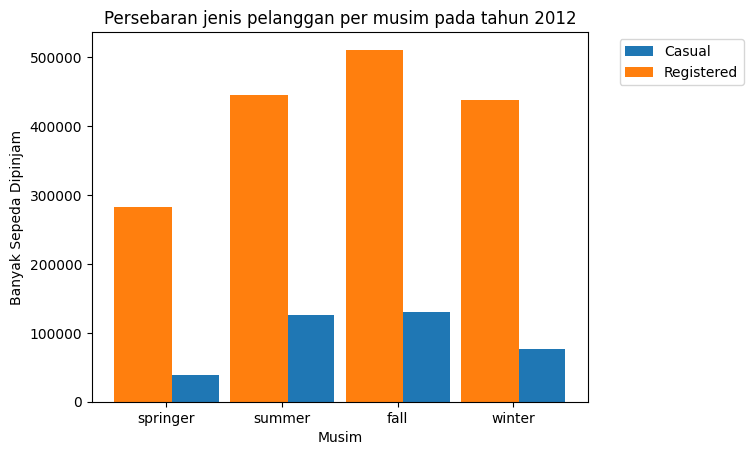

In [33]:
Casual_season2012 = day_df_2012.groupby(by="season").casual.sum()
Registered_season2012 = day_df_2012.groupby(by="season").registered.sum()

plt.bar(X1_axis+0.2, Casual_season2012, 0.5, label = 'Casual')
plt.bar(X1_axis-0.2, Registered_season2012,0.5, label = 'Registered')

plt.xticks(X1_axis, musim)
plt.xlabel("Musim")
plt.ylabel("Banyak Sepeda Dipinjam")
plt.title("Persebaran jenis pelanggan per musim pada tahun 2012")
plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()

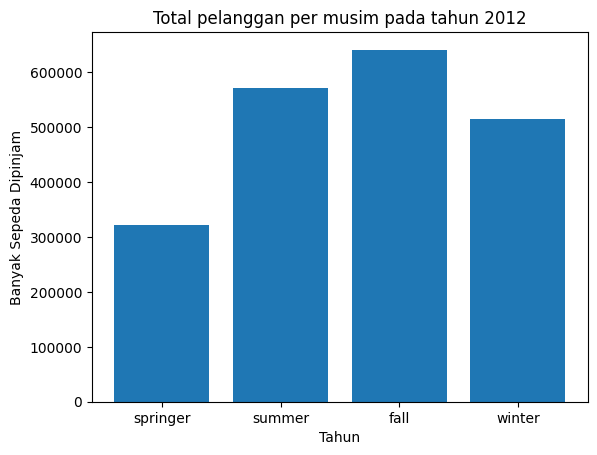

In [34]:
Count_season_2012 = day_df_2012.groupby(by="season").cnt.sum()

plt.bar(X1_axis, Count_season_2012, label = 'Total Pelanggan')

plt.xticks(X1_axis, musim)
plt.xlabel("Tahun")
plt.ylabel("Banyak Sepeda Dipinjam")
plt.title("Total pelanggan per musim pada tahun 2012")
#plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()

### Pertanyaan 3:

Bagaimana grafik perkembangan pelanggan tiap bulan pada tahun 2011 dan tahun 2012?

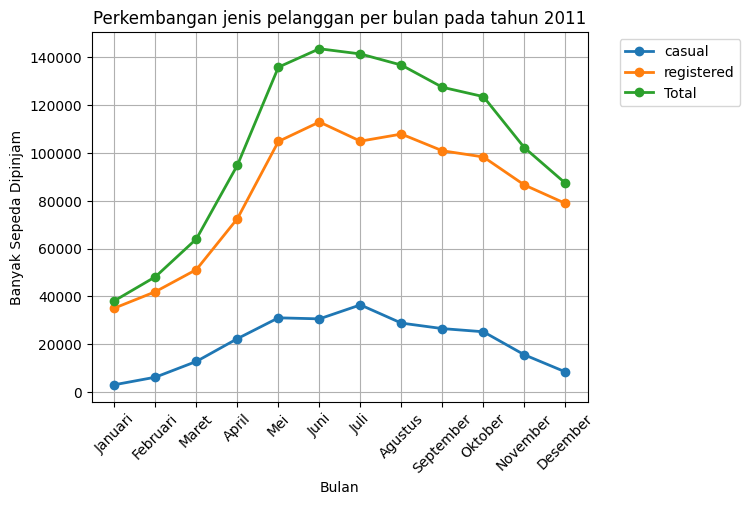

In [35]:
bulan = ('Januari', 'Februari', 'Maret','April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember')
Casual_month = day_df_2011.groupby(by="mnth").casual.sum()
Registered_month = day_df_2011.groupby(by="mnth").registered.sum()
Count_month = day_df_2011.groupby(by="mnth").cnt.sum()

X2_axis = np.arange(len(bulan))

plt.plot(
    X2_axis,
    Casual_month,
    marker='o',
    linewidth=2,
    label = 'casual'
)

plt.plot(
    X2_axis,
    Registered_month,
    marker='o',
    linewidth=2,
    label = 'registered'
)

plt.plot(
    X2_axis,
    Count_month,
    marker='o',
    linewidth=2,
    label = 'Total'
)

plt.grid()
plt.xticks(X2_axis, bulan, rotation=45)
plt.xlabel("Bulan")
plt.ylabel("Banyak Sepeda Dipinjam")
plt.title("Perkembangan jenis pelanggan per bulan pada tahun 2011")
plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()

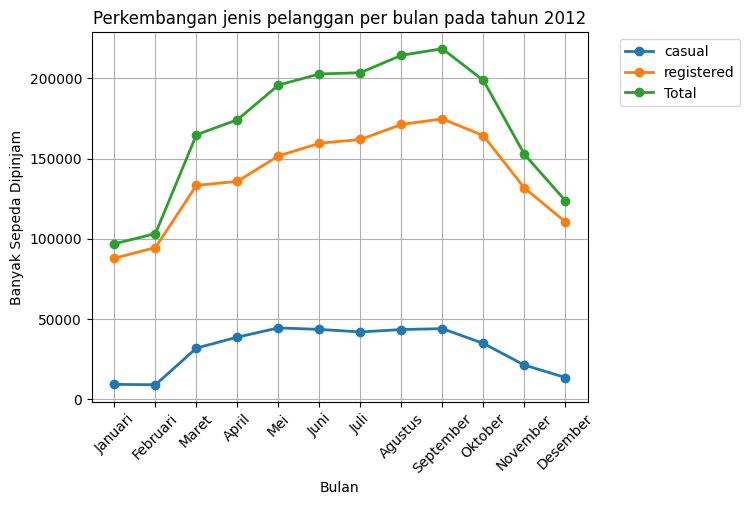

In [36]:
Casual_month_2012 = day_df_2012.groupby(by="mnth").casual.sum()
Registered_month_2012 = day_df_2012.groupby(by="mnth").registered.sum()
Count_month_2012 = day_df_2012.groupby(by="mnth").cnt.sum()

X2_axis = np.arange(len(bulan))

plt.plot(
    X2_axis,
    Casual_month_2012,
    marker='o',
    linewidth=2,
    label = 'casual'
)

plt.plot(
    X2_axis,
    Registered_month_2012,
    marker='o',
    linewidth=2,
    label = 'registered'
)

plt.plot(
    X2_axis,
    Count_month_2012,
    marker='o',
    linewidth=2,
    label = 'Total'
)

plt.grid()
plt.xticks(X2_axis, bulan, rotation=45)
plt.xlabel("Bulan")
plt.ylabel("Banyak Sepeda Dipinjam")
plt.title("Perkembangan jenis pelanggan per bulan pada tahun 2012")
plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()

Korelasi antara jumlah peminjaman sepeda dengan suhu, cuaca dan kecepatan angin?

                 cnt      temp  weathersit  windspeed
cnt         1.000000  0.404772   -0.142426   0.093234
temp        0.404772  1.000000   -0.102640  -0.023125
weathersit -0.142426 -0.102640    1.000000   0.026226
windspeed   0.093234 -0.023125    0.026226   1.000000


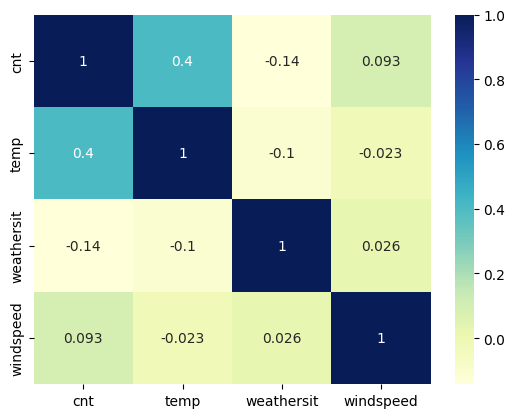

In [41]:
hour_corr=hour_df[["cnt","temp","weathersit","windspeed"]].copy()
print(hour_corr.corr())

# plotting correlation heatmap
dataplot = sns.heatmap(hour_corr.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

- Banyak peminjam sepeda berkolerasi positif dengan temperatur suhu sebesar $0,4$
- Banyak peminjam sepedda berkolerasi negatif dengan cuaca yang berlangsung sebesar $-0,14$
- Banyak peminjam sepeda tidak berkorelasi dengan kecepatan angin karena hanya sebesar $0,093$ (mendekati 0)

## Conclusion

- **Conclution pertanyaan 1** <br>
Terjadi peningkatan jumlah pelanggan baik pelanggan *registered* sebesar 68.38% dan pelanggan *casual* sebesar 50,76%.


- **Conclution pertanyaan 2** <br>
Pada tahun 2011 dan tahun 2012, pelanggan paling banyak terjadi saat musim *fall* sedang berlangsung.

- **Conclution pertanyaan 3** <br>
Pada tahun 2011 total pelanggan terbanyak terjadi pada bulan Juni sedangkan pada tahun 2012 total pelanggan terbanyak terjadi pada bulan September.

In [37]:
hour_df.to_csv("all_data.csv", index=False)